In [1]:
import numpy as np
import pandas as pd
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='serif'

In [2]:
url='http://hilpisch.com/aiif_eikon_eod_data.csv'

In [3]:
raw=pd.read_csv(url,index_col=0,parse_dates=True)['EUR=']
raw

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
               ...  
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
2020-01-01    1.1210
Name: EUR=, Length: 2609, dtype: float64

In [4]:
l=raw.resample('m').last()
l

Date
2010-01-31    1.3862
2010-02-28    1.3625
2010-03-31    1.3510
2010-04-30    1.3295
2010-05-31    1.2305
               ...  
2019-09-30    1.0898
2019-10-31    1.1150
2019-11-30    1.1015
2019-12-31    1.1210
2020-01-31    1.1210
Freq: M, Name: EUR=, Length: 121, dtype: float64

<AxesSubplot:title={'center':'EUR/US'}, xlabel='Date'>

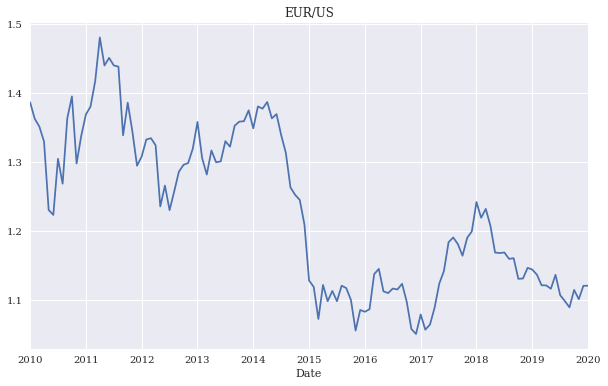

In [5]:
l.plot(figsize=(10,6),title='EUR/US')

In [6]:
l=l.values
l -= l.mean()
l

array([ 0.15702231,  0.13332231,  0.12182231,  0.10032231,  0.00132231,
       -0.00577769,  0.07532231,  0.03932231,  0.13382231,  0.16552231,
        0.06852231,  0.10852231,  0.13932231,  0.15092231,  0.18732231,
        0.25072231,  0.21022231,  0.22122231,  0.21032231,  0.20852231,
        0.10922231,  0.15642231,  0.11492231,  0.06532231,  0.07862231,
        0.10322231,  0.10512231,  0.09482231,  0.00642231,  0.03662231,
        0.00112231,  0.02832231,  0.05662231,  0.06662231,  0.06922231,
        0.09022231,  0.12862231,  0.07642231,  0.05262231,  0.08742231,
        0.07032231,  0.07162231,  0.10082231,  0.09282231,  0.12322231,
        0.12902231,  0.12972231,  0.14532231,  0.11932231,  0.15102231,
        0.14782231,  0.15742231,  0.13382231,  0.13992231,  0.10962231,
        0.08402231,  0.03392231,  0.02322231,  0.01582231, -0.01947769,
       -0.10057769, -0.10987769, -0.15617769, -0.10697769, -0.13047769,
       -0.11567769, -0.13047769, -0.10807769, -0.11157769, -0.12

In [7]:
f=np.linspace(-2,2,len(l))

Text(0, 0.5, 'labels')

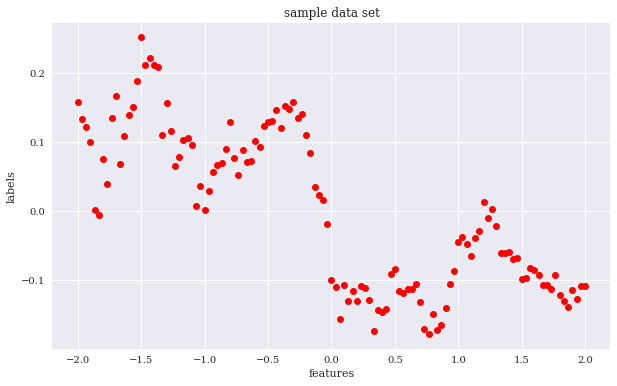

In [8]:
plt.figure(figsize=(10,6))
plt.plot(f,l,'ro')
plt.title('sample data set')
plt.xlabel('features')
plt.ylabel('labels')

In [9]:
def MSE(l,p):
    return np.mean((l-p)**2)

In [10]:
reg=np.polyfit(f,l,deg=5)
reg

array([-0.01910626, -0.0147182 ,  0.10990388,  0.06007211, -0.20833598,
       -0.03275423])

In [11]:
p=np.polyval(reg,f)

In [12]:
MSE(l,p)

0.0034166422957371016

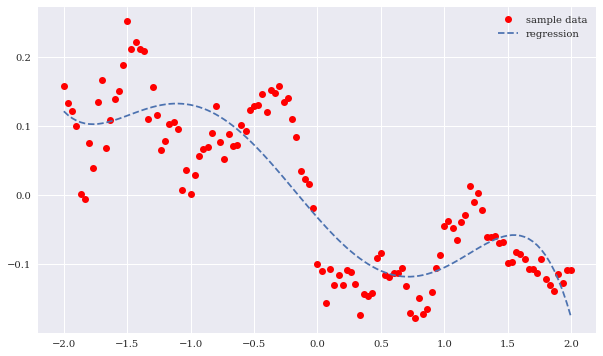

In [13]:
plt.figure(figsize=(10,6))
plt.plot(f,l,'ro',label='sample data')
plt.plot(f,p,'--',label='regression')
plt.legend()

In [14]:
%%time
for i in range(10,len(f)+1,20):
    reg=np.polyfit(f[:i],l[:i],deg=3)
    p=np.polyval(reg,f)
    mse=MSE(l,p)
    print(f'{i:3d} | MSE={mse}')

 10 | MSE=248628.10681594367
 30 | MSE=731.9382249304159
 50 | MSE=12.236088505004368
 70 | MSE=0.741059061974328
 90 | MSE=0.0057430617304093335
110 | MSE=0.006492800939555583
Wall time: 9.55 ms


Wall time: 100 ms


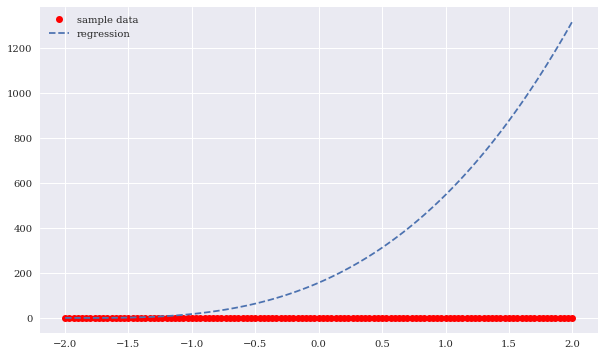

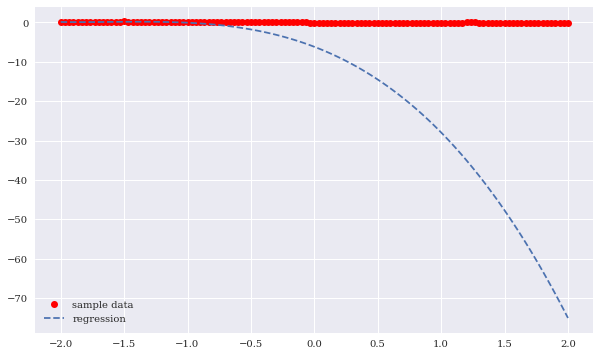

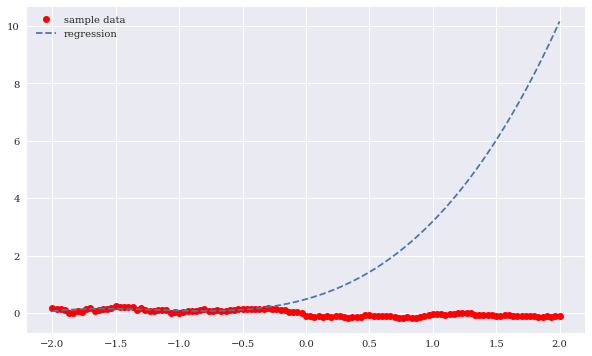

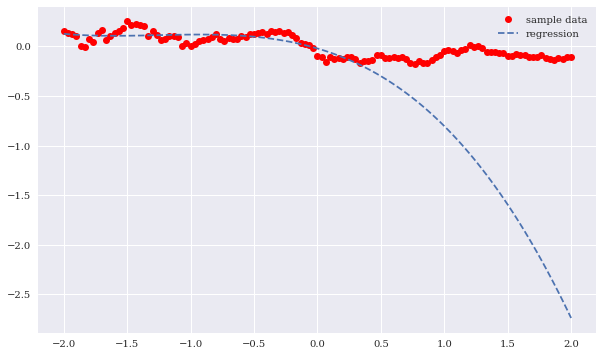

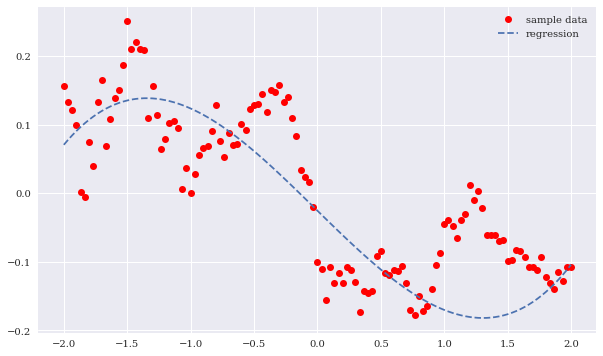

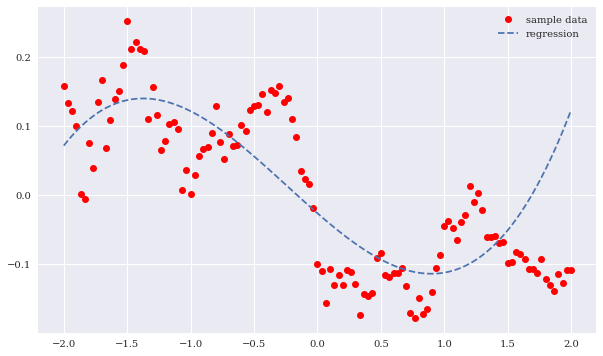

In [15]:
%%time
for i in range(10,len(f)+1,20):
    reg=np.polyfit(f[:i],l[:i],deg=3)
    p=np.polyval(reg,f)
    plt.figure(figsize=(10,6))
    plt.plot(f,l,'ro',label='sample data')
    plt.plot(f,p,'--',label='regression')
    plt.legend()

# DNN

In [16]:
import logging
import tensorflow as tf
tf.random.set_seed(100)
tf.get_logger().setLevel(logging.ERROR)
from tensorflow.keras import layers

In [17]:
# from keras.layers import Dense
# from keras.models import Sequential

In [18]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256,activation='relu',input_dim=1))
model.add(tf.keras.layers.Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='rmsprop')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [20]:
%time h=model.fit(f,l,epochs=1500, verbose=False)

Wall time: 8.81 s


In [21]:
f.shape

(121,)

In [22]:
p=model.predict(f).flatten()

In [23]:
MSE(l,p)

0.0011750543998312127

In [24]:
# flatten 就是降维 不然是（121,1）

<function matplotlib.pyplot.show(close=None, block=None)>

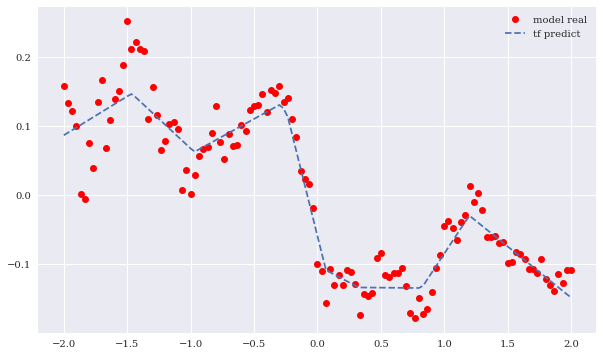

In [25]:
plt.figure(figsize=(10,6))
plt.plot(f,l,'ro',label='model real')
plt.plot(f,p,'--',label='tf predict')
plt.legend()
plt.show

In [26]:
res=pd.DataFrame(h.history)
res.tail()

,loss
1495,0.001214
1496,0.001455
1497,0.001614
1498,0.001412
1499,0.001678


Text(0.5, 0, 'epochs')

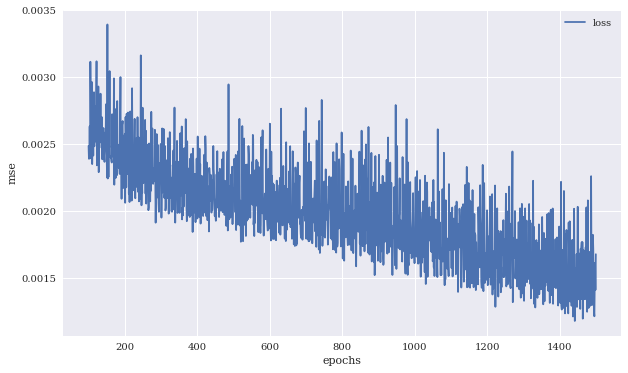

In [27]:
res.iloc[100:].plot(figsize=(10,6))
plt.ylabel('mse')
plt.xlabel('epochs')

# capacity

In [30]:
reg={}
for d in range(1,12,2):
    reg[d]=np.polyfit(f,l,deg=d)
    p=np.polyval(reg[d],f)
    mse=MSE(l,p)
    print(f'{d:2d} | MSE={mse}')

 1 | MSE=0.005322474034260403
 3 | MSE=0.004353110724143184
 5 | MSE=0.0034166422957371016
 7 | MSE=0.0027389501772354
 9 | MSE=0.0014119616263308387
11 | MSE=0.0012651237868752416


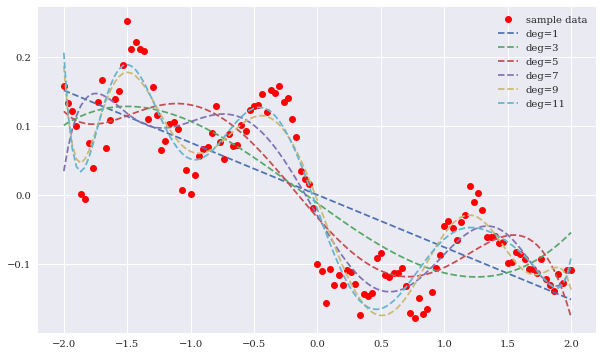

In [32]:
plt.figure(figsize=(10,6))
plt.plot(f,l,'ro',label='sample data')
for d in reg:
    p=np.polyval(reg[d],f)
    plt.plot(f,p,'--',label=f'deg={d}')
plt.legend()

In [25]:
def create_dnn_model(hl=1,hu=256):
    model=tf.keras.Sequential()
    for _ in range(hl):
        model.add(tf.keras.layers.Dense(hu,activation='relu',input_dim=1))
    model.add(tf.keras.layers.Dense(1,activation='linear'))
    model.compile(loss='mse',optimizer='rmsprop')
    return model

In [34]:
model=create_dnn_model(3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 132,353
Trainable params: 132,353
Non-trainable params: 0
_________________________________________________________________


In [35]:
%time model.fit(f,l,epochs=2500,verbose=False)

Wall time: 17.2 s


In [36]:
p=model.predict(f).flatten()

In [37]:
MSE(l,p)

0.0003843671160487134

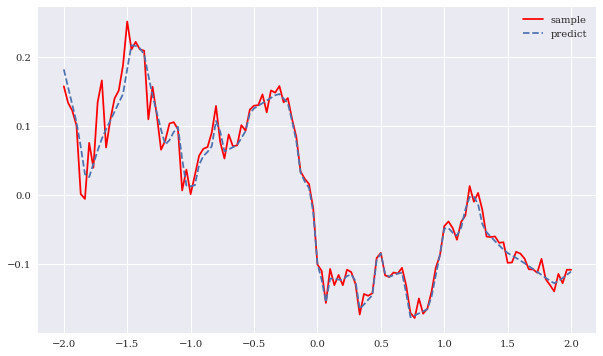

In [38]:
plt.figure(figsize=(10,6))
plt.plot(f,l,'r-',label='sample')
plt.plot(f,p,'--',label='predict')
plt.legend()

# Evaluation

In [39]:
te=int(0.25*len(f))
va=int(0.25*len(f))
te

30

In [40]:
np.random.seed(100)
ind=np.arange(len(f))
np.random.shuffle(ind)

In [41]:
ind

array([ 70, 115,  37,  46,  99,  26, 104, 102,  21,  33,  11,  69, 107,
        25,  32,  62,  54, 111,  29,  45,  28,  92,  91,  43,  35, 108,
        82,  96,  36,  77,  22,  51,  85,   5,  68,  23, 101, 117,  20,
        41,   6,   3,  75,  12,  57,   0,  80,  76,  84,  73,  40,  50,
        88,  81, 116,  78,  42,  90, 120,  17, 113,  74, 105,  72,  64,
        18,  44,  38,  39,  89, 114,  30,  56, 112, 109,  63,  19,  95,
        71,  55, 106,  61,  65,  47,  49,   7, 118,  59,  97,  83,  13,
         1,  31,   4,  27,   2,  86,  93,   9,  16,  58,  60, 100,  15,
       119,  34,  14, 110,  66,  53,  98,  52,  94,  10,  48,  79,  87,
       103,  67,  24,   8])

In [42]:
ind_te=np.sort(ind[:te])
ind_va=np.sort(ind[te:te+va])
ind_tr=np.sort(ind[te+va:])

In [43]:
f_te=f[ind_te]
f_va=f[ind_va]
f_tr=f[ind_tr]

In [44]:
l_te=l[ind_te]
l_va=l[ind_va]
l_tr=l[ind_tr]

In [46]:
reg={}
mse={}
for d in range(1,22,4):
    reg[d]=np.polyfit(f_tr,l_tr,deg=d)
    p=np.polyval(reg[d],f_tr)
    mse_tr=MSE(l_tr,p)
    
    p=np.polyval(reg[d],f_va)
    mse_va=MSE(l_va,p)
    
    mse[d]=(mse_tr,mse_va)
    
    print(f'{d:2d}| MSE_tr={mse_tr:7.5f} | MSE_va={mse_va:7.5f}')

 1| MSE_tr=0.00574 | MSE_va=0.00492
 5| MSE_tr=0.00375 | MSE_va=0.00273
 9| MSE_tr=0.00132 | MSE_va=0.00243
13| MSE_tr=0.00094 | MSE_va=0.00183
17| MSE_tr=0.00060 | MSE_va=0.00153
21| MSE_tr=0.00046 | MSE_va=0.00837


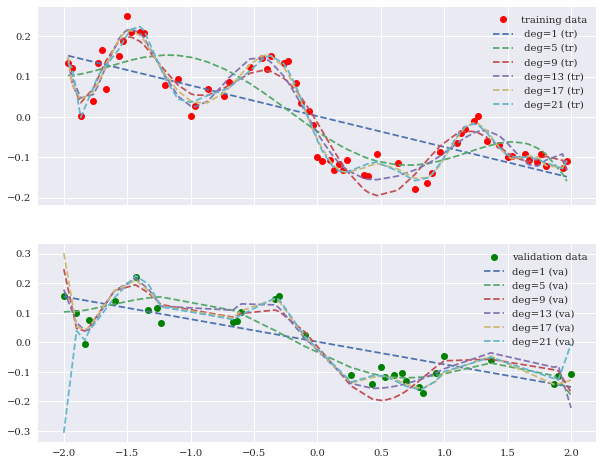

In [48]:
fig,ax =plt.subplots(2,1,figsize=(10,8),sharex=True)
ax[0].plot(f_tr,l_tr,'ro',label='training data')
ax[1].plot(f_va,l_va,'go',label='validation data')

for d in reg:
    p=np.polyval(reg[d],f_tr)
    ax[0].plot(f_tr,p,'--',label=f' deg={d} (tr)')
    p=np.polyval(reg[d],f_va)
    plt.plot(f_va,p,'--',label=f'deg={d} (va)')
    
ax[0].legend()
ax[1].legend()

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
model=create_dnn_model(2,256)

In [53]:
callbacks=[EarlyStopping(monitor='loss',patience=100,restore_best_weights=True)]

In [54]:
%%time

h=model.fit(f_tr,l_tr,epochs=3000,verbose=False,validation_data=(f_va,l_va),callbacks=callbacks)

Wall time: 13.8 s


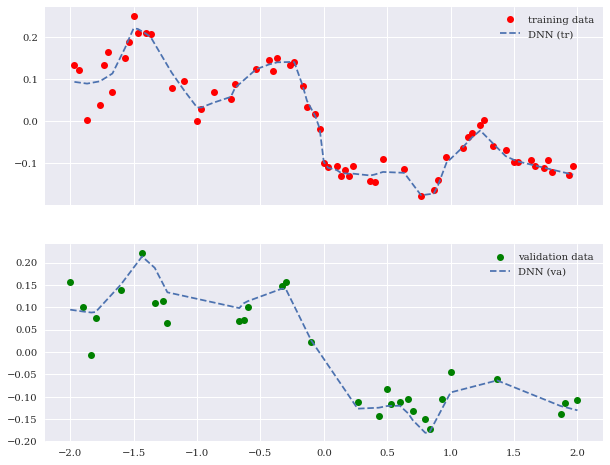

In [57]:
fig,ax =plt.subplots(2,1,sharex=True,figsize=(10,8))
ax[0].plot(f_tr,l_tr,'ro',label='training data')
p=model.predict(f_tr)
ax[0].plot(f_tr,p,'--',label=f'DNN (tr)')
ax[0].legend()

ax[1].plot(f_va,l_va,'go',label='validation data')
p=model.predict(f_va)
ax[1].plot(f_va,p,'--',label=f'DNN (va)')
ax[1].legend()

In [58]:
res=pd.DataFrame(h.history)
res.tail()

,loss,val_loss
907,0.000918,0.001234
908,0.000601,0.000910
909,0.000653,0.000781
910,0.000542,0.001036
911,0.000560,0.000936


In [59]:
res['loss'] .argmin()

811

Text(0.5, 0, 'opoches')

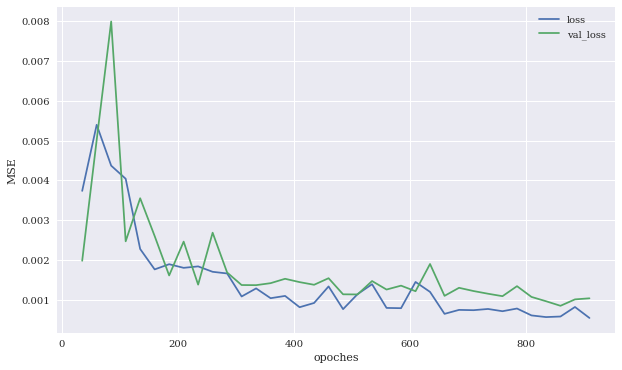

In [60]:
res.iloc[35::25].plot(figsize=(10,6))
plt.ylabel('MSE')
plt.xlabel('opoches')

In [65]:
p_ols=np.polyval(reg[17],f_te)
p_dnn=model.predict(f_te).flatten()

In [66]:
MSE(l_te,p_ols)

0.0009961405812949574

In [67]:
MSE(l_te,p_dnn)

0.0007857171331242589

# 将测试放进去

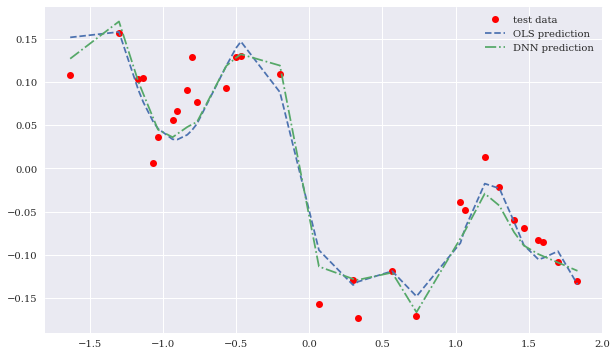

In [69]:
plt.figure(figsize=(10,6))
plt.plot(f_te,l_te,'ro',label='test data')
plt.plot(f_te,p_ols,'--',label='OLS prediction')
plt.plot(f_te,p_dnn,'-.',label='DNN prediction')
plt.legend()

In [72]:
res=pd.DataFrame(h.history)
res['val_loss'].argmin()

880

# Cross validation

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [20]:
def PolymomiaRegression(degree=None, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [21]:
np.set_printoptions(suppress=True,formatter={'float':lambda x: f'{x:12.2f}'})

In [22]:
# polyfit和polynomialfeatures都是多项式回归

In [23]:
print('\n Cross-validation scores')
print(74*'=')
for deg in range(0,10,1):
    model=PolymomiaRegression(deg)
    cvs=cross_val_score(model,f.reshape(-1,1),l,cv=5)
    print(f'deg={deg} | '+ str(cvs.round(2)))


 Cross-validation scores
deg=0 | [       -6.07        -7.34        -0.09        -6.32        -8.69]
deg=1 | [       -0.28        -1.40         0.16        -1.66        -4.62]
deg=2 | [       -3.48        -2.45         0.19        -1.57       -12.94]
deg=3 | [       -0.00        -1.24         0.32        -0.48       -43.62]
deg=4 | [     -222.81        -2.88         0.37        -0.32      -496.61]
deg=5 | [     -143.67        -5.85         0.49         0.12     -1241.04]
deg=6 | [    -4038.96       -14.71         0.49        -0.33      -317.32]
deg=7 | [    -9937.83       -13.98         0.64         0.22    -18725.61]
deg=8 | [    -3514.36       -11.22        -0.15        -6.29   -298744.18]
deg=9 | [    -7454.15        -0.91         0.15        -0.41    -13580.75]


In [24]:
np.random.seed(100)
tf.random.set_seed(100)
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [26]:
model=KerasRegressor(build_fn=create_dnn_model,verbose=False,epochs=1000,hl=1,hu=36)

In [27]:
%time cross_val_score(model,f,l,cv=5)

Wall time: 8.95 s


array([       -0.02,        -0.01,        -0.00,        -0.00,
              -0.08])

In [28]:
model=KerasRegressor(build_fn=create_dnn_model,verbose=False,epochs=1000,hl=3,hu=256)

In [29]:
%time cross_val_score(model,f,l,cv=5)

Wall time: 20.4 s


array([       -0.05,        -0.00,        -0.00,        -0.00,
              -0.05])